### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [53]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [29]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [30]:
data['has_children'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

In [31]:
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [40]:
data[
    [
        'Bar', 
        'CoffeeHouse', 
        'CarryAway', 
        'RestaurantLessThan20', 
        'Restaurant20To50'
    ]
].apply(pd.Series.value_counts)

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
1~3,2473,3225,4672,5376,3290
4~8,1076,1784,4258,3580,728
gt8,349,1111,1594,1285,264
less1,3482,3385,1856,2093,6077
never,5197,2962,153,220,2136


In [42]:
data[
    [
        'toCoupon_GEQ5min', 
        'toCoupon_GEQ15min', 
        'toCoupon_GEQ25min'
    ]
].apply(pd.Series.value_counts)

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
0,NaN,5562,11173
1,12684.0,7122,1511


In [43]:
data[
    [
        'direction_same', 
        'direction_opp'
    ]
].apply(pd.Series.value_counts)

,direction_same,direction_opp
0,9960,2724
1,2724,9960


3. Decide what to do about your missing data -- drop, replace, other...

# Missing or Problematic Data
## Missing Data
The following columns have missing values:
1. car
2. Bar
3. CoffeeHouse
4. CarryAway
5. RestaurantLessThan20
6. Restaurant20To50

### Car
The following values are included for <b>car</b>:
1. Scooter and motorcycle                    22
2. Mazda5                                        22
3. do not drive                                  22
4. crossover                                     21
5. Car that is too old to install Onstar :D    21

The only relevant information from this column are values that have <b>"do not drive"</b>. As this is study is meant to focus on coupons for people that drive, these rows should be dropped.

After that, given that the this column is so sparesley populated it likely would be better to just drop it entirely as no data could be considered statistically relevant.

### Times Going to X
Refers to the following columns:
- Bar
- CoffeeHouse
- CarryAway
- RestaurantLessThan20
- Restaurant20To50

For any <code>NaN</code> values, we will make the assumtion that these means the user never goes to these locations and as such will replace the value with <b>"never"</b>.

This may potentially skew the data incorrectly towards <b>"never"</b> values. However, the missing values for the given columns are relatively small, about 100 or so per column (out of 12684 rows), so this should not contribute to the data in a significant way. Still, it would be a good idea to keep this in mind when examining trends.

### HasChildren
While data indicates whether or a user does or does not have children (0/1), the User attributes information indicated that data would indicate how many children a user has (0/1/2+). This is not the case and should be reported as missing data.

## Problematic Data
### Passanger
<b>"passanger"</b> is misspelled incorrectly, should be renamed to <b>"passenger"</b>

### Age
<b>"age"</b> represents an age range, which is unclear from the values. Data should updated to make that more (eg. "21-25", "26-30")

### Times Going to X
For each column indicating the number of times a user goes to a given type of location, no time unit is specified (eg. "per week", "per month"). For the purposes of this analysis we will assume that all columns use the same time period, but a proper analysis would require confirming this information.

### ToCoupon
<b>"toCoupon_*"</b> represents time between destination and venue, with a <b>"greater than or equal to"</b> value. All three columns should be merged into one column, <b>"toCoupon_min"</b> with values <b>"5-14"</b>, <b>"15-24"</b>, or <b>"25+"</b> for more effective analysis.

### Direction
<b>"direction_same"</b> and <b>"direction_opp"</b> indicate the same information, should be merged into one column for more effective analysis. This can quickly be done by dropping one of the columns, <b>"direction_opp"</b>

### Y
<b>"Y"</b> column meaning is a bit ambiguous. Better to rename it to <b>"will_use_coupon"</b> for improved readability

In [54]:
# Remove rows that have 'do not drive' for column 'car'
rows_to_drop = data[data.car == 'do not drive'].index
data = data.drop(rows_to_drop)

# Should be 12662 (12684 - 22)
data.shape[0]

12662

In [55]:
# Remove 'car' column
data = data.drop('car', axis=1)

# Should not include 'car' column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12662 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12662 non-null  object
 1   passanger             12662 non-null  object
 2   weather               12662 non-null  object
 3   temperature           12662 non-null  int64 
 4   time                  12662 non-null  object
 5   coupon                12662 non-null  object
 6   expiration            12662 non-null  object
 7   gender                12662 non-null  object
 8   age                   12662 non-null  object
 9   maritalStatus         12662 non-null  object
 10  has_children          12662 non-null  int64 
 11  education             12662 non-null  object
 12  occupation            12662 non-null  object
 13  income                12662 non-null  object
 14  Bar                   12555 non-null  object
 15  CoffeeHouse           12445 non-null

In [56]:
# Fill in all NaN vlaues for 'times going to X'  columns
# Could do a simple df.fillna(0) but this is prone to bugs if the data were to change in the future
data = data.fillna(
    {
        'Bar': 'never',
        'CoffeeHouse': 'never',
        'CarryAway': 'never',
        'RestaurantLessThan20': 'never',
        'Restaurant20To50': 'never',
    }
)

# All non-null counts should be the same
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12662 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12662 non-null  object
 1   passanger             12662 non-null  object
 2   weather               12662 non-null  object
 3   temperature           12662 non-null  int64 
 4   time                  12662 non-null  object
 5   coupon                12662 non-null  object
 6   expiration            12662 non-null  object
 7   gender                12662 non-null  object
 8   age                   12662 non-null  object
 9   maritalStatus         12662 non-null  object
 10  has_children          12662 non-null  int64 
 11  education             12662 non-null  object
 12  occupation            12662 non-null  object
 13  income                12662 non-null  object
 14  Bar                   12662 non-null  object
 15  CoffeeHouse           12662 non-null

In [58]:
# Rename passanger column
data = data.rename(columns={'passanger': 'passenger'})

# Confirm new column name
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0


In [78]:
# Update values in age column
def update_age_values(row):
    age = row['age']
    
    match age:
        case '21':
            row['age'] = '21-25'
        case '26':
            row['age'] = '26-30'
        case '31':
            row['age'] = '31-35'
        case '36':
            row['age'] = '36-40'
        case '41':
            row['age'] = '41-45'
        case '46':
            row['age'] = '46-50'
        
    return row

data = data.apply(update_age_values, axis=1)

# Age values should be written as ranges
data['age'].value_counts()

21-25      2653
26-30      2537
31-35      2039
50plus     1788
36-40      1319
41-45      1093
46-50       686
below21     547
Name: age, dtype: int64

In [83]:
# Merge toCoupon columns into one column
def merge_tocoupon_columns_into_tocoupon_min(row):
    if row['toCoupon_GEQ25min'] == 1:
        row['toCoupon_min'] = '25+'
    elif row['toCoupon_GEQ15min'] == 1:
        row['toCoupon_min'] = '15-24'
    else:
        row['toCoupon_min'] = '5-14'
    
    return row

data = data.apply(merge_tocoupon_columns_into_tocoupon_min, axis=1)

# New column values should be written as ranges
data['toCoupon_min'].value_counts()

15-24    5602
5-14     5553
25+      1507
Name: toCoupon_min, dtype: int64

In [85]:
# Drop merged toCoupon columns
data = data.drop(['toCoupon_GEQ25min', 'toCoupon_GEQ15min', 'toCoupon_GEQ5min'], axis=1)

# Merged toCoupon columns should be dropped
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,toCoupon_min
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-25,Unmarried partner,...,$37500 - $49999,never,never,never,4~8,1~3,0,1,1,5-14
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-25,Unmarried partner,...,$37500 - $49999,never,never,never,4~8,1~3,0,1,0,5-14
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-25,Unmarried partner,...,$37500 - $49999,never,never,never,4~8,1~3,0,1,1,15-24
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-25,Unmarried partner,...,$37500 - $49999,never,never,never,4~8,1~3,0,1,0,15-24
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-25,Unmarried partner,...,$37500 - $49999,never,never,never,4~8,1~3,0,1,0,15-24


In [86]:
# Drop direction_opp column
data = data.drop('direction_opp', axis=1)

# direction_opp should not be in columns
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,Y,toCoupon_min
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,1,5-14
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,5-14
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,1,15-24
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,15-24
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,15-24


In [87]:
# Rename Y column to 'will_use_coupon'
data = data.rename(columns={'Y': 'will_use_coupon'})

# Confirm new column name
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,will_use_coupon,toCoupon_min
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,1,5-14
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,5-14
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,1,15-24
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,15-24
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,15-24


In [88]:
# Optimize dtypes
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12662 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12662 non-null  string
 1   passenger             12662 non-null  string
 2   weather               12662 non-null  string
 3   temperature           12662 non-null  Int64 
 4   time                  12662 non-null  string
 5   coupon                12662 non-null  string
 6   expiration            12662 non-null  string
 7   gender                12662 non-null  string
 8   age                   12662 non-null  string
 9   maritalStatus         12662 non-null  string
 10  has_children          12662 non-null  Int64 
 11  education             12662 non-null  string
 12  occupation            12662 non-null  string
 13  income                12662 non-null  string
 14  Bar                   12662 non-null  string
 15  CoffeeHouse           12662 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [92]:
# Mean returns the percentage of True values when using a boolean (0/1)
data.will_use_coupon.mean() * 100

56.86305480966672

5. Use a bar plot to visualize the `coupon` column.

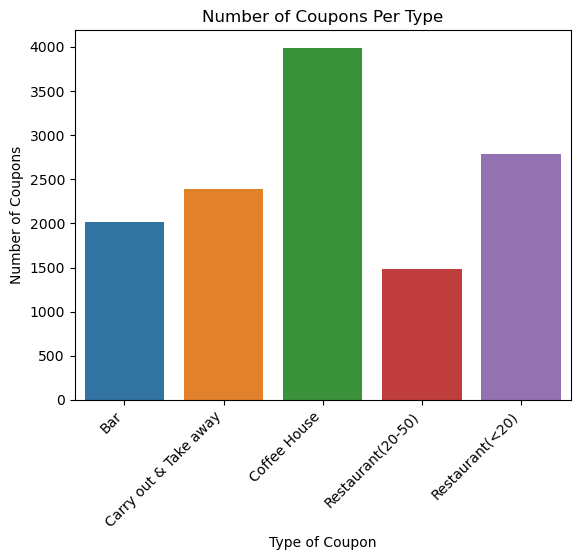

In [170]:
# Get counts of different types of coupons
coupon = data['coupon'].value_counts()

# Update index name (x-axis)
coupon.index.name = 'Type of Coupon'

# Reset index, update coupon name (y-axis)
coupon = coupon.reset_index(name='Number of Coupons')

# Create Barplot
coupon_barplot = sns.barplot(
    data=coupon, 
    x='Type of Coupon', 
    y='Number of Coupons', 
    order=coupon.sort_values(['Type of Coupon'])['Type of Coupon']
)

# Set title
coupon_barplot.set(title='Number of Coupons Per Type')

# Rotate x-axis labels 45 degrees for readability
coupon_barplot.set_xticklabels(coupon_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save image for later reference
plt.savefig('images/coupon_barplot.png')

6. Use a histogram to visualize the temperature column.

/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/user/anaconda3/envs/berkeley-mlai/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


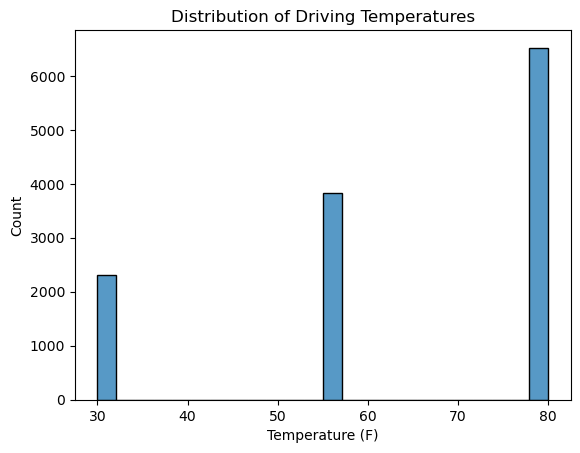

In [177]:
sns.histplot(data, x='temperature')
plt.xlabel('Temperature (F)')
plt.title('Distribution of Driving Temperatures')

plt.savefig('images/temperature_histplot.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [180]:
bar_coupon_data = data[data['coupon'] == 'Bar']
bar_coupon_data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,will_use_coupon,toCoupon_min
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,15-24
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,5-14
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,25+
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21-25,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,5-14
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21-25,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,5-14


2. What proportion of bar coupons were accepted?


In [181]:
bar_coupon_data['will_use_coupon'].mean() * 100

40.94292803970223

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [185]:
# Create list with values for 3 or less visits
three_or_fewer = ['never', 'less1', '1~3']

customers_with_few_visits = bar_coupon_data.query('Bar in @three_or_fewer')
customers_with_many_visits = bar_coupon_data.query('Bar not in @three_or_fewer')

print(customers_with_few_visits['will_use_coupon'].mean() * 100)
print(customers_with_many_visits['will_use_coupon'].mean() * 100)

37.073707370737075
76.6497461928934


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [207]:
# Create list with values for 1 or less visits
one_or_fewer = ['never', 'less1']

customers_over_25_with_multiple_bar_visits = bar_coupon_data.query('Bar not in @one_or_fewer and age != "21-25"')

# Perform a merge with indicator=True to find values that only exist in the original bar_coupon_data dataframe
all_other_customers = bar_coupon_data.merge(
    customers_over_25_with_multiple_bar_visits,
    left_index=True,
    right_index=True,
    how='outer',
    indicator=True
)

all_other_customers = all_other_customers[all_other_customers['_merge'] == 'left_only']

print(customers_over_25_with_multiple_bar_visits['will_use_coupon'].mean() * 100)
print(all_other_customers['will_use_coupon_x'].mean() * 100)

68.69158878504673
33.459357277882795


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [220]:
# Create list for passengers that are not a kid
passengers_not_a_kid = ['Friends(s)', 'Partner']

regular_customers_with_non_kid_passengers_and_non_farming_occupation = bar_coupon_data.query(
    '''
        Bar not in @one_or_fewer and \
        passenger in @passengers_not_a_kid and \
        occupation != "Farming Fishing & Forestry"
    '''
)

# Perform a merge with indicator=True to find values that only exist in the original bar_coupon_data dataframe
all_other_customers = bar_coupon_data.merge(
    regular_customers_with_non_kid_passengers_and_non_farming_occupation,
    left_index=True,
    right_index=True,
    how='outer',
    indicator=True
)

all_other_customers = all_other_customers[all_other_customers['_merge'] == 'left_only']

print(regular_customers_with_non_kid_passengers_and_non_farming_occupation['will_use_coupon'].mean() * 100)
print(all_other_customers['will_use_coupon_x'].mean() * 100)

60.0
40.20618556701031


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [247]:
# Create lists for various conditionals
under_thirty = ['below21', '21-25', '26-30']
more_than_four_month = ['4~8', 'gt8']
income_lessthan_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# First query conditions
bar_more_than_once = ~bar_coupon_data['Bar'].isin(one_or_fewer)
passenger_not_a_kid = bar_coupon_data['passenger'].isin(passengers_not_a_kid)
not_a_widow = bar_coupon_data['maritalStatus'] != 'Widowed'

first_group = bar_coupon_data[bar_more_than_once & passenger_not_a_kid & not_a_widow]
first_group_percent = first_group['will_use_coupon'].mean() * 100
print(f'Just the first group percentage is {first_group_percent}%')

# Second query conditions 
customer_under_thirty = bar_coupon_data['age'].isin(under_thirty)

second_group = bar_coupon_data[bar_more_than_once & customer_under_thirty]
second_group_percent = second_group['will_use_coupon'].mean() * 100
print(f'Just the second group percentage is {second_group_percent}%')

# Third query conditons
restaurant_4_or_more_times_a_month = bar_coupon_data['RestaurantLessThan20'].isin(more_than_four_month)
customer_income_lessthan_50k = bar_coupon_data['income'].isin(income_lessthan_50k)

third_group = bar_coupon_data[restaurant_4_or_more_times_a_month & customer_income_lessthan_50k]
third_group_percent = third_group['will_use_coupon'].mean() * 100
print(f'Just the third group percentage is {third_group_percent}%')

# Combining the above three queries into one nested query
comparing_customers = bar_coupon_data[
    (
        bar_more_than_once &
        passenger_not_a_kid &
        not_a_widow
    ) |
    (
        bar_more_than_once &
        customer_under_thirty
    ) |
    (
        restaurant_4_or_more_times_a_month &
        customer_income_lessthan_50k
    )
]

# Perform a merge with indicator=True to find values that only exist in the original bar_coupon_data dataframe
all_other_customers = bar_coupon_data.merge(
    comparing_customers,
    left_index=True,
    right_index=True,
    how='outer',
    indicator=True
)

all_other_customers = all_other_customers[all_other_customers['_merge'] == 'left_only']

print(comparing_customers['will_use_coupon'].mean() * 100)
print(all_other_customers['will_use_coupon_x'].mean() * 100)

Just the first group percentage is 60.0%
Just the second group percentage is 72.01166180758017%
Just the third group percentage is 45.348837209302324%
55.96774193548387
34.26523297491039


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Bar Coupon Observations
Overall, approximately 41% of customers receiving a bar coupon ended up using the coupon.

Further, there were a few trends that stood out among individuals more likely to use coupons:
1. Customers that tend to visit bars frequently (4+/month)
2. Customers using coupons tend to be between 25 and 30 years old
3. Customers having no child passengers
4. Customers in a non farming occupation
5. Customers that are not widows

Of the above, the factors that had the highest impact were a high frequency of visits and an age range of 25-30.

If we were to profile the type of individuals likely to use bar coupons based on this data, we can imagine an individual in their late 20's with no obligations of taking care of a child. These individuals are young and just starting to make money (ie still relatively not affluent) but are looking to socialize as much as possible. As such, a bar establishment would be a highly desirable location to them and anything that could help them save their relatively small amount of income when going to a bar would be readily accepted.

Based on this, my recommendation if we want to maximize coupon use is to target bar coupons to those individuals between 25-30 that frequently visit such establishments. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating Coffee House Coupons**

Create a new `DataFrame` that contains just coffee house coupons.

In [251]:
coffeehouse_coupon_data = data[data['coupon'] == 'Coffee House']
coffeehouse_coupon_data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,will_use_coupon,toCoupon_min
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,5-14
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,15-24
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,15-24
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,1,15-24
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,0,5-14


Filter for customers that accepted the coupon

In [252]:
will_use_coupon = coffeehouse_coupon_data[coffeehouse_coupon_data['will_use_coupon'] == 1]
will_use_coupon.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,will_use_coupon,toCoupon_min
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,1,15-24
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,1,25+
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21-25,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,1,15-24
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46-50,Single,...,Student,$12500 - $24999,never,4~8,1~3,1~3,never,0,1,5-14
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46-50,Single,...,Student,$12500 - $24999,never,4~8,1~3,1~3,never,0,1,5-14


### Barplot of Coffee House Coupons Used Per Age Range

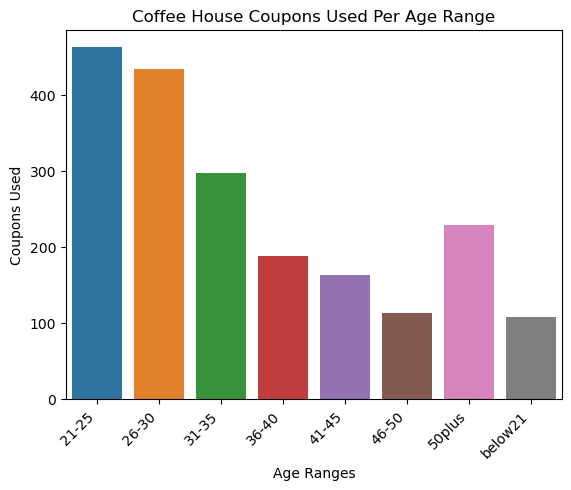

In [275]:
# Get counts of different age ranges that used coupons
age_counts = will_use_coupon['age'].value_counts()

# Update index name (x-axis)
age_counts.index.name = 'Age Ranges'

# Reset index, update coupon name (y-axis)
age_counts = age_counts.reset_index(name='Coupons Used')

# Create Barplot
age_count_barplot = sns.barplot(
    data=age_counts, 
    x='Age Ranges', 
    y='Coupons Used', 
    order=age_counts.sort_values('Age Ranges')['Age Ranges']
)

# Set title
age_count_barplot.set(title='Coffee House Coupons Used Per Age Range')

# Rotate x-axis labels 45 degrees for readability
age_count_barplot.set_xticklabels(age_count_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save image for later reference
plt.savefig('images/coffee_house_coupon_barplot.png')

### Piechart of Distribution of Coupons Used Per Age Range

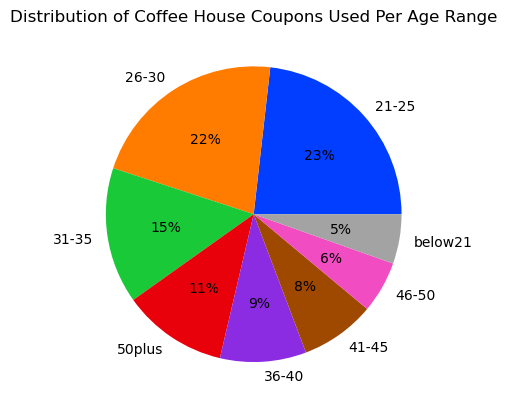

In [274]:
# Define plot data
data = age_counts['Coupons Used']
labels = age_counts['Age Ranges']
colors = sns.color_palette('bright')[0:8]

# Create plot
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Coffee House Coupons Used Per Age Range')

# Save image for later reference
plt.savefig('images/distribution_of_used_coffeehouse_coupons_per_age_range.png')